<a href="https://colab.research.google.com/github/Vonewman/Deep_Learning_models_with_pytorch/blob/master/PyTorch_for_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import numpy library
import numpy as np

# numpy array
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [3]:
import torch

# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x7fcb47cf7870>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [4]:
# numpy ones
print("Numpy {}\n".format(np.ones((2,3))))

# pytorch ones
print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [5]:
# numpy random
print("Numpy {}\n".format(np.random.rand(2,3)))

# pytorch random
print(torch.rand(2,3))

Numpy [[0.02880185 0.80668784 0.45253793]
 [0.80359574 0.60222919 0.34790862]]

tensor([[0.8947, 0.6213, 0.5546],
        [0.0338, 0.5793, 0.9010]])


In [6]:
# random numpy array
array = np.random.rand(2,2)
print("{} {}\n".format(type(array),array))

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.17436503 0.8696262 ]
 [0.62340308 0.90412671]]

tensor([[0.1744, 0.8696],
        [0.6234, 0.9041]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.17436503 0.8696262 ]
 [0.62340308 0.90412671]]



In [7]:
from torch.autograd import Variable

## Linear Regression

In [8]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

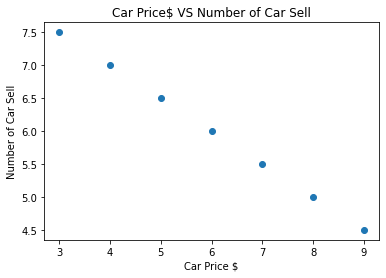

In [9]:
# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

In [10]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import warnings
warnings.filterwarnings("ignore")

In [16]:
# create class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)
    

In [17]:
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

In [18]:
# MSE
mse = nn.MSELoss()

In [19]:
# Optimization (find parameters that minimize error)
from torch.optim import SGD

optimizer = SGD(model.parameters(), lr=0.02)

In [20]:
# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))


epoch 0, loss 23.788715362548828
epoch 50, loss 5.773085117340088
epoch 100, loss 3.9011142253875732
epoch 150, loss 2.636146306991577
epoch 200, loss 1.7813551425933838
epoch 250, loss 1.2037380933761597
epoch 300, loss 0.8134164810180664
epoch 350, loss 0.5496598482131958
epoch 400, loss 0.37142840027809143
epoch 450, loss 0.2509896159172058
epoch 500, loss 0.16960430145263672
epoch 550, loss 0.11460865288972855
epoch 600, loss 0.07744573056697845
epoch 650, loss 0.05233336612582207
epoch 700, loss 0.03536362573504448
epoch 750, loss 0.02389661967754364
epoch 800, loss 0.016147993505001068
epoch 850, loss 0.010911875404417515
epoch 900, loss 0.007373434491455555
epoch 950, loss 0.004982538986951113
epoch 1000, loss 0.003366862190887332


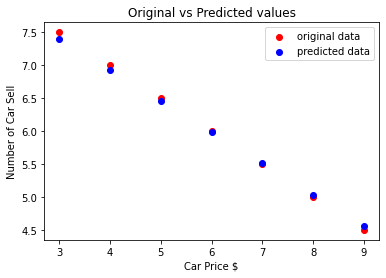

In [21]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()